In [67]:
#Dependencies 
import os
import csv

import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
import math


In [68]:
# Study data files
combined_data_path = "stores_and_stops/combined_data.csv"

# Read the data 
combined_data = pd.read_csv(combined_data_path)

combined_data.head()



,Unnamed: 0,CensusTract,State,County,POP2010,OHU2010,NUMGQTRS,LILATracts_halfAnd10,PovertyRate,MedianFamilyIncome,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Census Tract,distance
0,0,4013010101,Arizona,Maricopa,5073,2246,0,0,4.5,116833,...,44,61,7,12,80,161,42,0,4013010101,99.0
1,1,4013010102,Arizona,Maricopa,4640,2041,0,0,7.9,143490,...,21,108,5,6,133,169,73,14,4013010102,99.0
2,2,4013030401,Arizona,Maricopa,4283,2008,47,0,6.2,107693,...,30,65,0,11,77,111,58,21,4013030401,88.0
3,3,4013030402,Arizona,Maricopa,3895,1706,0,0,7.6,108188,...,27,27,3,18,193,320,0,19,4013030402,88.0
4,4,4013040502,Arizona,Maricopa,4861,2188,169,1,20.7,50377,...,12,24,1,85,396,759,195,258,4013040502,88.0


In [69]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
distortions = []

X = combined_data.drop(["CensusTract", "State","County"], axis = 1)

K = range(1,15)

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0])

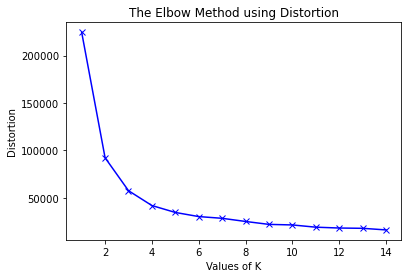

In [70]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [71]:
kmeans = KMeans(n_clusters=4)

# Fit the model to the data
kmeans.fit(X)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X)
predicted_clusters

X["Cluster"] = predicted_clusters

X.head()

,Unnamed: 0,POP2010,OHU2010,NUMGQTRS,LILATracts_halfAnd10,PovertyRate,MedianFamilyIncome,TractLOWI,TractKids,TractSeniors,...,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Census Tract,distance,Cluster
0,0,5073,2246,0,0,4.5,116833,429,729,1645,...,61,7,12,80,161,42,0,4013010101,99.0,0
1,1,4640,2041,0,0,7.9,143490,598,579,1240,...,108,5,6,133,169,73,14,4013010102,99.0,0
2,2,4283,2008,47,0,6.2,107693,628,539,1431,...,65,0,11,77,111,58,21,4013030401,88.0,0
3,3,3895,1706,0,0,7.6,108188,599,606,792,...,27,3,18,193,320,0,19,4013030402,88.0,0
4,4,4861,2188,169,1,20.7,50377,2513,962,1340,...,24,1,85,396,759,195,258,4013040502,88.0,0


In [99]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

#plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=50, cmap='viridis')

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [72]:
X_group = X.groupby("Cluster").mean()

X_group

,Unnamed: 0,POP2010,OHU2010,NUMGQTRS,LILATracts_halfAnd10,PovertyRate,MedianFamilyIncome,TractLOWI,TractKids,TractSeniors,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Census Tract,distance
Cluster,,,,,,,,,,,,,,,,,,,,,
0,264.0,4178.784499,1529.086957,56.992439,0.421550,20.749149,61760.402647,1799.030246,1125.153119,521.548204,...,253.321361,119.561437,7.393195,78.620038,846.990548,1545.716446,123.376181,223.474480,4.013107e+09,27.776148
1,767.5,4380.581818,1683.527273,33.745455,0.127273,9.630000,78932.045455,1093.972727,1107.154545,497.481818,...,120.190909,184.236364,6.190909,45.063636,384.145455,684.890909,65.490909,130.445455,4.013606e+09,40.823506
2,620.5,4124.342391,1579.059783,75.190217,0.347826,16.760870,63101.190217,1540.342391,998.945652,526.288043,...,159.135870,125.527174,14.548913,106.875000,546.413043,973.603261,118.097826,176.233696,4.013402e+09,26.035088
3,869.0,3933.301075,1365.172043,58.935484,0.064516,9.812903,82161.021505,754.043011,1151.204301,378.301075,...,150.645161,275.419355,5.602151,130.290323,329.236559,608.344086,30.935484,70.827957,4.013824e+09,48.654884


In [73]:
X['Cluster'].value_counts()

0    529
2    184
1    110
3     93
Name: Cluster, dtype: int64

In [74]:
import scipy.stats as stats

from statsmodels.multivariate.manova import MANOVA

In [75]:
maov = MANOVA.from_formula('POP2010 + NUMGQTRS + LILATracts_halfAnd10 + PovertyRate + TractBlack + TractAsian + TractNHOPI + TractAIAN + TractOMultir + TractHispanic + TractSNAP + distance  ~ Cluster', data=X)
#maov = MANOVA.from_formula('POP2010 + NUMGQTRS ~ Cluster', data=X)

In [76]:
print(maov.mv_test())


                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value   Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.1072 12.0000 903.0000 626.5000 0.0000
         Pillai's trace 0.8928 12.0000 903.0000 626.5000 0.0000
 Hotelling-Lawley trace 8.3256 12.0000 903.0000 626.5000 0.0000
    Roy's greatest root 8.3256 12.0000 903.0000 626.5000 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
         Cluster         Value   Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.7848 12.0000 903.0000 20.6338 0.0000
          Pillai's trace 0.2152 12.0000 903.0000 20.6338 0.

In [78]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [80]:
model = ols("LILATracts_halfAnd10 ~ C(Cluster)", data= X).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Cluster),15.543534,3.0,25.058976,1.387781e-15
Residual,188.564544,912.0,NaN,NaN


In [81]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=X['LILATracts_halfAnd10'], groups=X['Cluster'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.2943  0.001 -0.4169 -0.1716   True
     0      2  -0.0737 0.2313 -0.1739  0.0264  False
     0      3   -0.357  0.001 -0.4886 -0.2254   True
     1      2   0.2206  0.001  0.0795  0.3616   True
     1      3  -0.0628 0.7354 -0.2276  0.1021  False
     2      3  -0.2833  0.001 -0.4322 -0.1344   True
----------------------------------------------------


In [82]:
model2 = ols("distance ~ C(Cluster)", data= X).fit()
aov_table2 = sm.stats.anova_lm(model2, typ=2)
aov_table2

,sum_sq,df,F,PR(>F)
C(Cluster),4.962474e+04,3.0,8.660896,0.000011
Residual,1.741843e+06,912.0,NaN,NaN


In [83]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp2 = pairwise_tukeyhsd(endog=X['distance'], groups=X['Cluster'], alpha=0.05)
print(m_comp2)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  13.0474 0.0232  1.2602 24.8345   True
     0      2  -1.7411    0.9 -11.368  7.8859  False
     0      3  20.8787  0.001  8.2311 33.5263   True
     1      2 -14.7884 0.0262 -28.345 -1.2318   True
     1      3   7.8314 0.5713 -8.0136 23.6764  False
     2      3  22.6198  0.001  8.3087 36.9308   True
----------------------------------------------------


In [84]:
model3 = ols("PovertyRate ~ C(Cluster)", data= X).fit()
aov_table3 = sm.stats.anova_lm(model3, typ=2)
aov_table3

,sum_sq,df,F,PR(>F)
C(Cluster),17993.718822,3.0,26.950609,1.050276e-16
Residual,202967.235894,912.0,NaN,NaN


In [85]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp3 = pairwise_tukeyhsd(endog=X['PovertyRate'], groups=X['Cluster'], alpha=0.05)
print(m_comp3)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1 -11.1191  0.001 -15.1428 -7.0955   True
     0      2  -3.9883 0.0099  -7.2745  -0.702   True
     0      3 -10.9362  0.001 -15.2536 -6.6189   True
     1      2   7.1309  0.001   2.5032 11.7585   True
     1      3   0.1829    0.9  -5.2259  5.5917  False
     2      3   -6.948 0.0015 -11.8331 -2.0628   True
-----------------------------------------------------


In [86]:
model4 = ols("TractBlack ~ C(Cluster)", data= X).fit()
aov_table4 = sm.stats.anova_lm(model4, typ=2)
aov_table4

,sum_sq,df,F,PR(>F)
C(Cluster),2.679996e+06,3.0,21.581371,1.648729e-13
Residual,3.775102e+07,912.0,NaN,NaN


In [87]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp4 = pairwise_tukeyhsd(endog=X['TractBlack'], groups=X['Cluster'], alpha=0.05)
print(m_comp4)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     0      1 -133.1305  0.001 -188.0046 -78.2563   True
     0      2  -94.1855  0.001 -139.0032 -49.3678   True
     0      3 -102.6762  0.001 -161.5562 -43.7962   True
     1      2    38.945 0.3869  -24.1668 102.0567  False
     1      3   30.4543 0.6889   -43.311 104.2195  False
     2      3   -8.4907    0.9  -75.1148  58.1334  False
--------------------------------------------------------


In [88]:
model5 = ols("TractHispanic ~ C(Cluster)", data= X).fit()
aov_table5 = sm.stats.anova_lm(model5, typ=2)
aov_table5

,sum_sq,df,F,PR(>F)
C(Cluster),1.334467e+08,3.0,34.491603,4.045927e-21
Residual,1.176164e+09,912.0,NaN,NaN


In [89]:
m_comp5 = pairwise_tukeyhsd(endog=X['TractHispanic'], groups=X['Cluster'], alpha=0.05)
print(m_comp5)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     0      1 -860.8255  0.001  -1167.119  -554.532   True
     0      2 -572.1132  0.001  -822.2741 -321.9522   True
     0      3 -937.3724  0.001 -1266.0252 -608.7195   True
     1      2  288.7124 0.1509   -63.5611  640.9858  False
     1      3  -76.5468    0.9  -488.2856  335.1919  False
     2      3 -365.2592 0.0564  -737.1376    6.6193  False
----------------------------------------------------------


In [90]:
model6 = ols("TractAsian ~ C(Cluster)", data= X).fit()
aov_table6 = sm.stats.anova_lm(model6, typ=2)
aov_table6

,sum_sq,df,F,PR(>F)
C(Cluster),2.162912e+06,3.0,36.326556,3.517495e-22
Residual,1.810040e+07,912.0,NaN,NaN


In [91]:
m_comp6 = pairwise_tukeyhsd(endog=X['TractAsian'], groups=X['Cluster'], alpha=0.05)
print(m_comp6)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     0      1  64.6749  0.001   26.6781 102.6718   True
     0      2   5.9657    0.9  -25.0677  36.9992  False
     0      3 155.8579  0.001  115.0873 196.6286   True
     1      2 -58.7092 0.0032 -102.4101 -15.0083   True
     1      3   91.183  0.001   40.1052 142.2607   True
     2      3 149.8922  0.001  103.7592 196.0251   True
-------------------------------------------------------


In [92]:
model7 = ols("TractOMultir ~ C(Cluster)", data= X).fit()
aov_table7 = sm.stats.anova_lm(model7, typ=2)
aov_table7

,sum_sq,df,F,PR(>F)
C(Cluster),3.910356e+07,3.0,33.885487,9.089982e-21
Residual,3.508134e+08,912.0,NaN,NaN


In [93]:
m_comp7 = pairwise_tukeyhsd(endog=X['TractOMultir'], groups=X['Cluster'], alpha=0.05)
print(m_comp7)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     0      1 -462.8451  0.001 -630.1242 -295.5659   True
     0      2 -300.5775  0.001 -437.2004 -163.9546   True
     0      3  -517.754  0.001 -697.2445 -338.2635   True
     1      2  162.2676  0.132  -30.1231  354.6582  False
     1      3  -54.9089    0.9 -279.7759  169.9581  False
     2      3 -217.1765 0.0307 -420.2742  -14.0788   True
---------------------------------------------------------
